<a href="https://colab.research.google.com/github/gsc16/MachineLearning/blob/master/hw2/hw2_arch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Architecture 1

This simple architecture has 3 convolutional layers and two dense layers. I have used the activation functions 'relu' and 'softmax'. I have achieved a validation accuracy of 71.15% by training for 40 epochs. I have used the learning rate 0.0001.

Imports

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import os

Using TensorFlow backend.


Loading data

In [2]:
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = cifar10.load_data()

170500096/170498071 [==============================] - 31s 0us/step


In [3]:
train_images_original.shape, train_labels_original.shape,test_images_original.shape, test_labels_original.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

Displaying some images

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
table = [[] for _ in range(10)]
for i in range(len(train_images_original)):
  label = train_labels_original[i, 0]
  table[label].append(i)

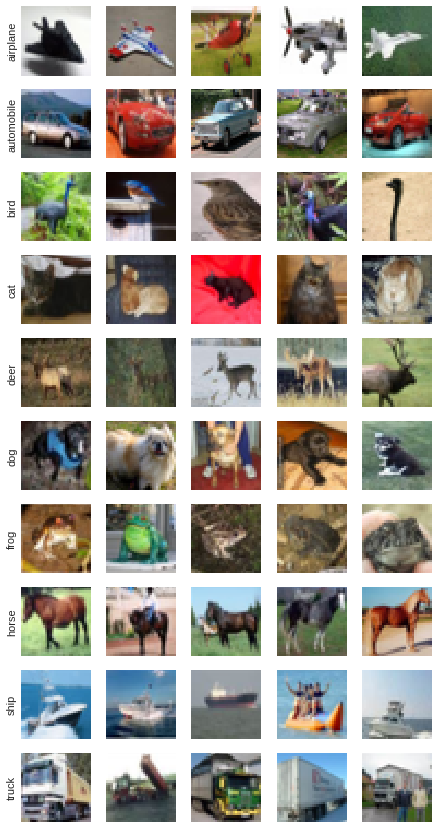

In [5]:
plt.figure(figsize=(15,15))
for class_index in range(10):
  for example_index in range(5):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images_original[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

Definition for Simple Holdout validation

In [0]:
def holdout_val(data,index):
  t_data = data[:index]
  val_data = data[index:]
  return t_data,val_data

Shuffling the original training dataset

Images before shuffling


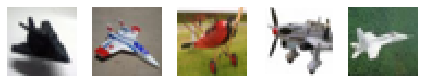

Images after shuffling


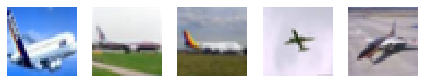

In [7]:
# Shuffling
index_shuffled = np.random.permutation(50000)
train_images_shuffled = train_images_original[index_shuffled]
train_labels_shuffled = train_labels_original[index_shuffled]

#Displaying few images before shuffling
print("Images before shuffling")
table = [[] for _ in range(10)]
for i in range(len(train_images_original)):
  label = train_labels_original[i, 0]
  table[label].append(i)
  
plt.figure(figsize=(15,15))
for class_index in range(1):
  for example_index in range(5):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_original[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()  

# Displaying images after shuffling for same indices
print("Images after shuffling")
table = [[] for _ in range(10)]
for i in range(len(train_images_shuffled)):
  label = train_labels_shuffled[i, 0]
  table[label].append(i)
  
plt.figure(figsize=(15,15))
for class_index in range(1):
  for example_index in range(5):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_shuffled[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()  

Splitting the original training data into training and validation data sets

In [8]:
# Getting the training the training and validation datasets
train_images, val_images = holdout_val(train_images_shuffled,40000)
train_labels,val_labels = holdout_val(train_labels_shuffled,40000)

train_images.shape,val_images.shape,train_labels.shape,val_labels.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 1), (10000, 1))

Flattening and reshaping of images

In [9]:
train_labels = keras.utils.to_categorical(train_labels,10) # Since we have 10 classes
val_labels =keras.utils.to_categorical(val_labels,10)
test_labels = keras.utils.to_categorical(test_labels_original,10)

train_images = train_images.astype('float32')/255
val_images = val_images.astype('float32')/255
test_images = test_images_original.astype('float32')/255

train_images.shape, val_images.shape, test_images.shape, train_labels.shape, val_labels.shape, test_labels.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

Building the model

In [10]:
batch_size = 32
num_epochs = 40


model = Sequential()

# Layer 1
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=train_images.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Layer2
model.add(Conv2D(64, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Layer 3
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Dense layers
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation ='softmax'))

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flat

Running the model

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr = 0.0001),
              metrics=['accuracy'])

metrics = model.fit(train_images, train_labels,
              batch_size = batch_size,
              epochs= num_epochs,
              validation_data=(val_images, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 86s 2ms/step - loss: 1.8689 - acc: 0.3166 - val_loss: 1.6403 - val_acc: 0.4121
Epoch 2/40
40000/40000 [==============================] - 85s 2ms/step - loss: 1.5802 - acc: 0.4273 - val_loss: 1.4970 - val_acc: 0.4673
Epoch 3/40
40000/40000 [==============================] - 85s 2ms/step - loss: 1.4541 - acc: 0.4770 - val_loss: 1.3875 - val_acc: 0.5104
Epoch 4/40
40000/40000 [==============================] - 84s 2ms/step - loss: 1.3680 - acc: 0.5148 - val_loss: 1.3020 - val_acc: 0.5336
Epoch 5/40
40000/40000 [==============================] - 84s 2ms/step - loss: 1.3002 - acc: 0.5386 - val_loss: 1.2914 - val_acc: 0.5444
Epoch 6/40
40000/40000 [==============================] - 85s 2ms/step - loss: 1.2398 - acc: 0.5637 - val_loss: 1.2164 - val_acc: 0.5757
Epoch 7/40
40000/40000 [==============================] - 85s 2ms/step - loss: 1

Saving the model

In [12]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


Displaying the Training and Validation Accuracy

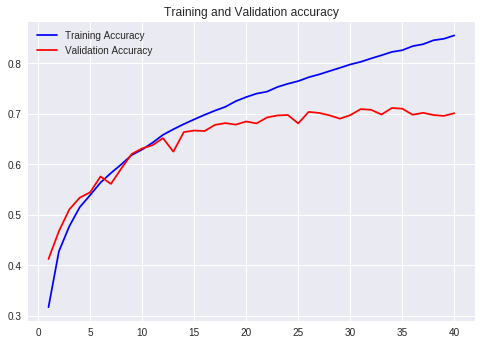

In [13]:
train_acc = metrics.history['acc']
val_acc = metrics.history['val_acc']


epochs = range(1, len(train_acc) + 1)


plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


Evaluating on test data

In [14]:
# Evaluating on the test data
metrics_test = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', metrics_test[0])
print('Test accuracy:', metrics_test[1])

10000/10000 [==============================] - 7s 685us/step
Test loss: 0.9858717911720276
Test accuracy: 0.7019
